In [1]:
#|default_exp app

## Gradio Dogs classifier

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

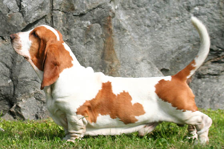

In [3]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([1.1052e-06, 6.3919e-05, 1.7038e-07, 6.9371e-07, 1.6348e-07, 1.2355e-05,
         6.1358e-07, 7.5065e-07, 3.3859e-07, 3.8036e-07, 9.1114e-07, 4.6855e-06,
         1.1798e-05, 2.7002e-05, 9.9844e-01, 1.1119e-03, 2.4641e-06, 3.0583e-08,
         1.8604e-05, 5.0454e-07, 2.7129e-06, 7.5549e-07, 3.4601e-06, 3.1499e-06,
         1.0551e-05, 1.9220e-06, 3.3227e-07, 1.1528e-06, 2.0841e-06, 3.1390e-06,
         2.6923e-04, 4.1458e-07, 4.6974e-06, 6.8495e-08, 8.1838e-07, 1.4024e-07,
         3.5885e-07]))

In [6]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Abyssinian': 1.1052484296669718e-06,
 'Bengal': 6.391949864337221e-05,
 'Birman': 1.703842826827895e-07,
 'Bombay': 6.937071930224192e-07,
 'British_Shorthair': 1.6347689779649954e-07,
 'Egyptian_Mau': 1.2354697901173495e-05,
 'Maine_Coon': 6.135849730526388e-07,
 'Persian': 7.506537826884596e-07,
 'Ragdoll': 3.385853801773919e-07,
 'Russian_Blue': 3.80361342422475e-07,
 'Siamese': 9.11137703951681e-07,
 'Sphynx': 4.685501608037157e-06,
 'american_bulldog': 1.1798315426858608e-05,
 'american_pit_bull_terrier': 2.7001642592949793e-05,
 'basset_hound': 0.9984366297721863,
 'beagle': 0.0011118714464828372,
 'boxer': 2.4641033178340876e-06,
 'chihuahua': 3.058348951867629e-08,
 'english_cocker_spaniel': 1.8603957869345322e-05,
 'english_setter': 5.045378657086985e-07,
 'german_shorthaired': 2.712880132094142e-06,
 'great_pyrenees': 7.554922376584727e-07,
 'havanese': 3.4600750495883403e-06,
 'japanese_chin': 3.1499175747740082e-06,
 'keeshond': 1.0550967999733984e-05,
 'leonberger': 1.92

In [8]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

/Users/prasanth.thangavel/.pyenv/versions/3.10.5/envs/fastai_related/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/prasanth.thangavel/.pyenv/versions/3.10.5/envs/fastai_related/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/Users/prasanth.thangavel/.pyenv/versions/3.10.5/envs/fastai_related/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/prasanth.thangavel/.pyenv/versions/3.10.5/envs/fastai_related/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__ini

In [25]:
#|export
intf = gr.Interface(
    fn=classify_image, inputs=image, outputs=label, examples=examples,
    title="Dog Breed Classifier",
    description="Classifier is fine-tuned on pre-trained resnet34 model")
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [10]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [11]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2548e+00,  1.9193e+00,  1.2196e+00,  1.0408e+00, -8.3188e-04,
          7.6621e-01,  8.8759e-01,  1.6324e+00,  7.0546e-01,  3.2889e+00,
          7.8554e-01, -6.1709e-04,  9.9950e-01, -2.2638e-03,  3.2981e+00,
         -5.7606e-04,  1.9837e+00,  1.0217e+00,  4.4522e+00,  2.5687e-01,
          2.7243e+00,  9.2496e-01,  1.2363e+00,  4.0675e-03,  1.7874e+00,
          5.4314e-01,  4.6267e+00,  1.1971e-02, -1.2741e-03,  3.4504e+00,
          1.3509e+00,  4.1251e+00,  2.6871e+00,  4.1206e+00,  3.3997e+00,
          8.4934e-01,  7.3714e-01,  3.9786e+00,  1.2864e+00,  6.4068e-01,
          2.6898e+00,  1.1186e+00,  1.1696e+00,  5.5259e-01,  2.3346e+00,
          1.6150e-03,  9.6813e-01,  4.2501e-04,  1.1970e+00,  1.7889e+00,
          4.0116e-01,  4.5047e-01,  9.7276e-01,  3.9896e+00,  6.5790e-01,
          6.8785e-01,  9.8607e-01,  2.7069e+00,  1.2161e+00,  7.6307e-01,
          3.3012e+00,  1.6203e+00,  9.5506e-01,  2.1210e+00,  6.2877e-01,
          4.032

In [12]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0229, -0.0015,  0.0404,  ...,  0.0017, -0.0453,  0.0080],
         [-0.1439,  0.0169,  0.0260,  ...,  0.0125, -0.1045,  0.0563],
         [-0.0653, -0.0328,  0.0059,  ..., -0.0417,  0.0659, -0.0403],
         ...,
         [-0.0090,  0.0698,  0.0001,  ...,  0.0042,  0.0416, -0.0191],
         [ 0.0020,  0.0321,  0.0298,  ..., -0.0299, -0.0304,  0.0555],
         [ 0.1210, -0.0355, -0.0043,  ..., -0.0062,  0.0238, -0.0114]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4048, -0.7419, -0.4235, -0.1651, -0.3026, -0.1900, -0.5534, -0.6271,
         -0.3007, -0.4253, -0.5995, -0.4106, -0.2174, -1.7934, -0.3171, -0.1165,
         -0.4483, -0.2848, -0.4343, -0.4946, -0.4065, -1.1402, -0.6755, -1.7238,
         -0.2954, -0.2655, -0.2188, -0.3912, -0.4149, -0.4770,  0.2364, -0.7542,
         -0.5851, -0.1820, -1.5275, -0.3625, -2.4690, -2.3462, -0.6109, -0.4114,
         -0.6963, -0.5763, -0.5876, -0.0319, -2.0354, -0.2857, -0.3954, -0.8403

# Export to .py file

In [26]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful


In [27]:
!ls -a -l

total 231664
drwxr-xr-x  17 prasanth.thangavel  staff        544 Jun 10 17:33 .
drwxr-xr-x   7 prasanth.thangavel  staff        224 Jun  6 08:28 ..
-rw-r--r--@  1 prasanth.thangavel  staff       6148 Jun 10 17:29 .DS_Store
drwxr-xr-x  15 prasanth.thangavel  staff        480 Jun 10 17:18 .git
-rw-r--r--   1 prasanth.thangavel  staff       1257 Jun  6 08:28 .gitattributes
-rw-r--r--   1 prasanth.thangavel  staff         30 Jun  6 08:28 .gitignore
drwxr-xr-x   4 prasanth.thangavel  staff        128 Jun 10 17:22 .ipynb_checkpoints
-rw-r--r--   1 prasanth.thangavel  staff        273 Jun  6 09:38 README.md
drwxr-xr-x   3 prasanth.thangavel  staff         96 Jun 10 17:29 __pycache__
-rw-r--r--   1 prasanth.thangavel  staff     141084 Jun 10 17:33 app.ipynb
-rw-r--r--   1 prasanth.thangavel  staff        813 Jun 10 17:33 app.py
-rw-r--r--   1 prasanth.thangavel  staff      74775 Jun  6 08:28 basset.jpg
-rw-r--r--@  1 prasanth.thangavel  staff     483187 Jun 10 17:22 fastai-prd-apps-pets-traini

In [28]:
!cat app.py

# AUTOGENERATED! DO NOT EDIT! File to edit: app.ipynb.

# %% auto 0
__all__ = ['learn', 'categories', 'image', 'label', 'examples', 'intf', 'classify_image']

# %% app.ipynb 2
from fastai.vision.all import *
import gradio as gr
import timm

# %% app.ipynb 4
learn = load_learner('model.pkl')

# %% app.ipynb 6
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

# %% app.ipynb 8
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

# %% app.ipynb 9
intf = gr.Interface(
    fn=classify_image, inputs=image, outputs=label, examples=examples,
    title="Dog Breed Classifier",
    description="Classifier is fine-tuned on pre-trained resnet34 model")
intf.launch(inline=False)


# Pip requirements

In [24]:
!pip freeze > requirements_all.txt